# Imports

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
from pathlib import Path

Using TensorFlow backend.


## Import Data

In [2]:
# data = pd.read_csv('2018_10_18_trump.csv', header=None, nrows=1000)
data = pd.read_csv('2018_10_18_trump.csv', header=None)
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']

data.columns = cards + forehand + user + trump
data.drop('user', axis='columns', inplace=True)
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,6
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,5
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,5
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,4


add data column with NrD, NrH, NrS, NrC, NrA, Nr6

In [3]:
data.insert(loc=len(data.columns), column='NrD', value=data.iloc[:,0:9].sum(axis=1) / 9.0)
data.insert(loc=len(data.columns), column='NrH', value=data.iloc[:,9:18].sum(axis=1) / 9.0)
data.insert(loc=len(data.columns), column='NrS', value=data.iloc[:,18:27].sum(axis=1) / 9.0)
data.insert(loc=len(data.columns), column='NrC', value=data.iloc[:,27:36].sum(axis=1) / 9.0)

data.insert(loc=len(data.columns), column='NrA', value=data.iloc[:,0:36:9].sum(axis=1) / 4.0)
data.insert(loc=len(data.columns), column='Nr6', value=data.iloc[:,8:36:9].sum(axis=1) / 4.0)
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C7,C6,FH,trump,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,0,0,1,1,0,1,1,0,0,...,0,0,0,6,0.444444,0.000000,0.333333,0.222222,0.25,0.00
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,5,0.111111,0.444444,0.222222,0.222222,0.25,0.50
2,1,0,0,1,0,0,0,0,0,0,...,1,1,0,6,0.222222,0.222222,0.222222,0.333333,0.50,0.25
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,5,0.000000,0.333333,0.333333,0.333333,0.50,0.50
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,4,0.222222,0.555556,0.111111,0.111111,0.25,0.50


In [4]:
x = data.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6','FH']) 
x.head()

,DJ,D9,HJ,H9,SJ,S9,CJ,C9,NrD,NrH,NrS,NrC,NrA,Nr6,FH
0,1,0,0,0,1,0,0,0,0.444444,0.000000,0.333333,0.222222,0.25,0.00,0
1,0,0,0,1,0,0,1,0,0.111111,0.444444,0.222222,0.222222,0.25,0.50,0
2,1,0,1,0,0,0,0,0,0.222222,0.222222,0.222222,0.333333,0.50,0.25,0
3,0,0,0,0,0,0,0,1,0.000000,0.333333,0.333333,0.333333,0.50,0.50,0
4,0,0,0,0,0,0,1,0,0.222222,0.555556,0.111111,0.111111,0.25,0.50,1


In [5]:
y_label = data['trump']
y = keras.utils.to_categorical(y_label, num_classes=7)

model = keras.Sequential()
model.add(keras.layers.Dense(15, activation='relu', input_shape=[15]))
model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.Dense(30, activation='relu'))
# model.add(keras.layers.Dense(60, activation='relu'))
# model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=100, shuffle=True)

Train on 269868 samples, validate on 89957 samples
Epoch 1/50
269868/269868 [==============================] - 3s 9us/step - loss: 1.5037 - accuracy: 0.4611 - val_loss: 1.2149 - val_accuracy: 0.5531
Epoch 2/50
269868/269868 [==============================] - 3s 9us/step - loss: 1.1080 - accuracy: 0.5821 - val_loss: 1.0214 - val_accuracy: 0.6015
Epoch 3/50
269868/269868 [==============================] - 2s 9us/step - loss: 0.9947 - accuracy: 0.6091 - val_loss: 0.9746 - val_accuracy: 0.6169
Epoch 4/50
269868/269868 [==============================] - 2s 9us/step - loss: 0.9677 - accuracy: 0.6167 - val_loss: 0.9603 - val_accuracy: 0.6172
Epoch 5/50
269868/269868 [==============================] - 2s 9us/step - loss: 0.9588 - accuracy: 0.6180 - val_loss: 0.9573 - val_accuracy: 0.6214
Epoch 6/50
269868/269868 [==============================] - 2s 9us/step - loss: 0.9544 - accuracy: 0.6184 - val_loss: 0.9495 - val_accuracy: 0.6205
Epoch 7/50
269868/269868 [==============================] - 2

In [6]:
model.summary()
print(model.get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 455       
Total params: 1,719
Trainable params: 1,719
Non-trainable params: 0
_________________________________________________________________
[array([[ 0.31218708, -0.29839596,  0.25708973,  0.16172509, -0.40813756,
         0.05506689, -0.13856572,  0.06868256, -0.00166896, -0.5621278 ,
         0.16324681,  0.00877826,  0.4602008 ,  0.34751958,  0.09365427],
       [ 0.25500917, -0.04802934,  0.28453904,  0.05103241, -0.22537142,
         0.03835748, -0.12982365, -0.06714266,  0.09324562, -0.23269163,
         0.1537

### Test 01
with:
* 15 / dense
* 32 / dense
* 7 / dense

val_accuracy => 0.6229976415634155


### Test 02
with:
* 15 / dense
* 64 / dense
* 64 / dense
* 7 / dense

val_accuracy => 0.6294229626655579


### Test 03
with:
* 15 / dense
* 11 / dense
* 7 / dense

val_accuracy => 0.6157942414283752
### Test 04
with:
* 15 / dense
* 30 / dense
* 60 / dense
* 32 / dense
* 7 / dense

val_accuracy => 0.6275553703308105


### Test 05
with:
* 15 / dense
* 64 / dense
* 7 / dense

val_accuracy => 

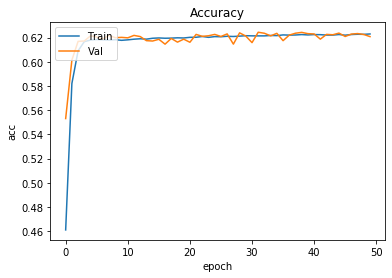

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
len(data)

359825

In [10]:
history.history['val_accuracy'][-1]

0.6208188533782959